<a href="https://colab.research.google.com/github/CLKim00/Machine-Learning/blob/main/ML/KaggleDataset/KNN_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('adult.csv')

print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [3]:
df.shape

(48842, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
print(df.workclass.unique())
print(df.education.unique())
print(df['marital-status'].unique())
print(df.occupation.unique())
print(df.relationship.unique())
print(df.race.unique())
print(df.gender.unique())
print(df['native-country'].unique())

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' '

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [9]:
#replace ? to nan
df.replace('?', np.nan, inplace=True)

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
print(f"After cleaning the dataset we get {df.shape[0]} rows and {df.shape[1]} columns in our detaset.")

After cleaning the dataset we get 45175 rows and 15 columns in our detaset.


In [13]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


workclass

In [14]:
print(df.workclass.nunique())
print(df['workclass'].value_counts())

7
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


Text(0.5, 1.0, 'Distribution of Workclass')

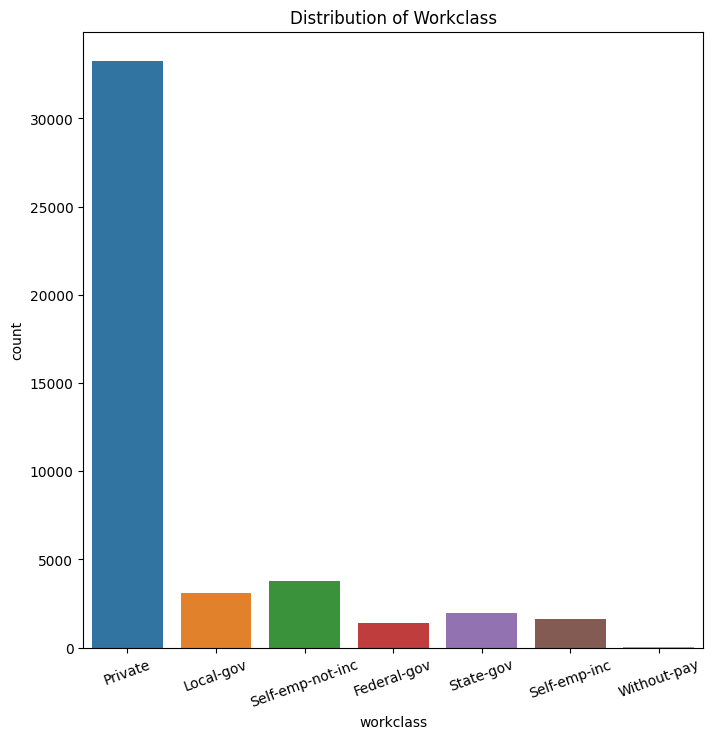

In [15]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = df.workclass)
plt.xticks(rotation = 20)
plt.title("Distribution of Workclass")

<Axes: xlabel='income', ylabel='count'>

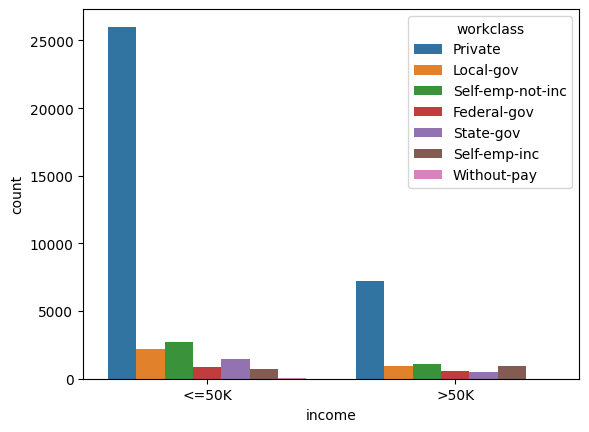

In [16]:
sns.countplot(data = df, x = 'income', hue = 'workclass')

education, educational-num

In [17]:
print(df.education.nunique())
print(df['education'].value_counts())

16
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64


Text(0.5, 1.0, 'Distribution of Education')

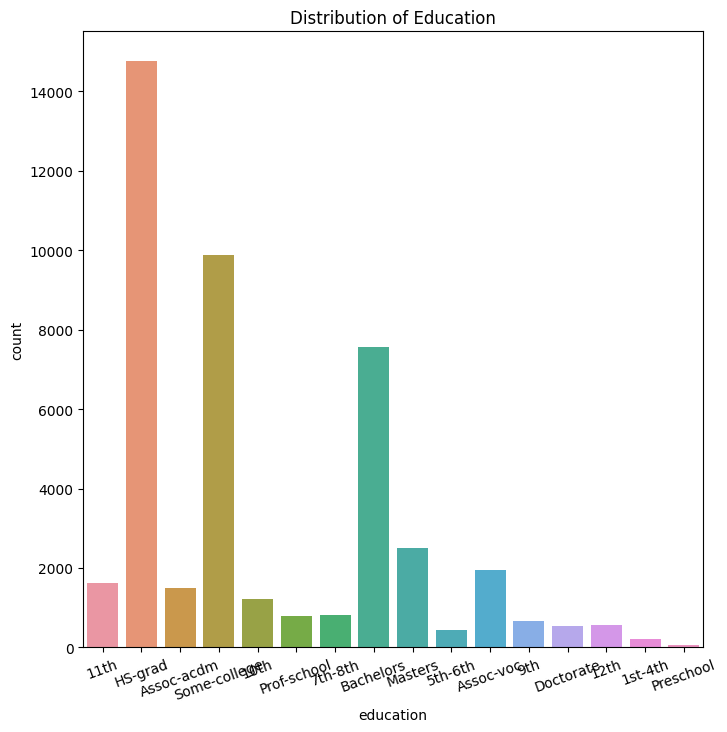

In [18]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = df.education)
plt.xticks(rotation = 20)
plt.title("Distribution of Education")

<Axes: xlabel='income', ylabel='count'>

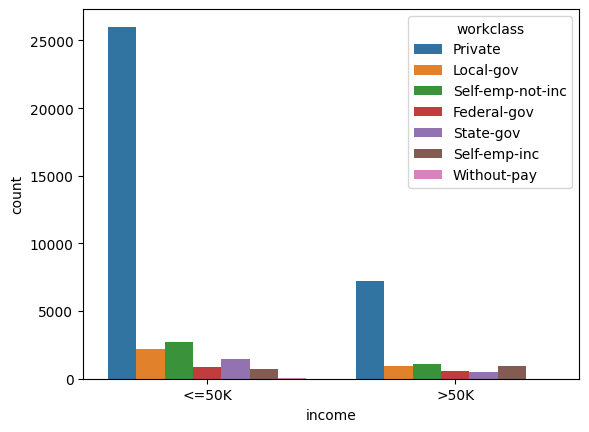

In [19]:
sns.countplot(data = df, x = 'income', hue = 'workclass')

In [20]:
print(df['educational-num'].nunique())
print(df['educational-num'].value_counts())

16
9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64


In [21]:
# ['education'] == ['education-num']
# delete ['education-num']

df.drop(['educational-num'], axis=1, inplace=True)

marital-status

In [22]:
print(df['marital-status'].nunique())
print(df['marital-status'].value_counts())

7
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64


occupation

In [23]:
print(df.occupation.nunique())
print(df['occupation'].value_counts())

14
Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64


<Axes: xlabel='income', ylabel='count'>

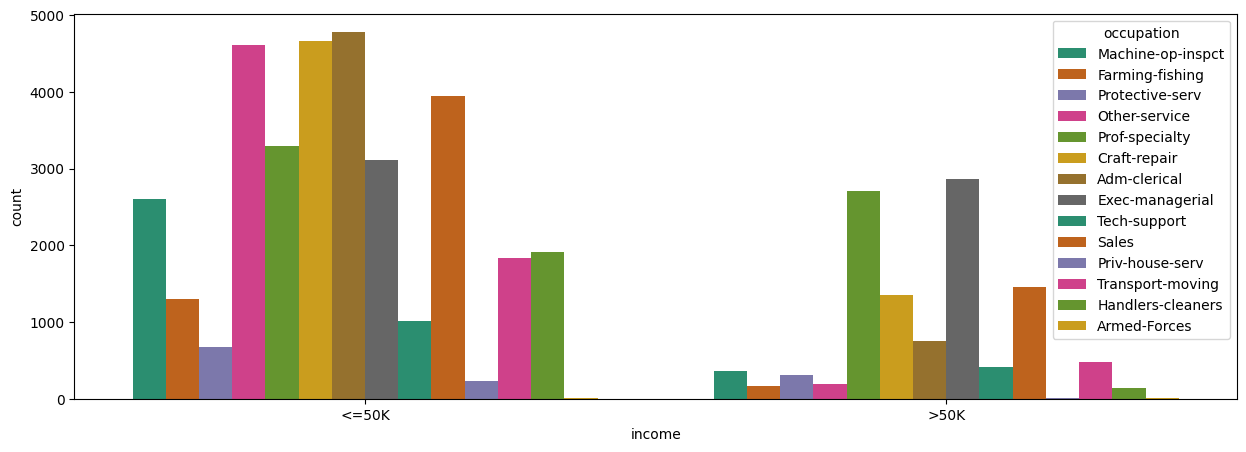

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'income', hue = 'occupation', palette='Dark2')

relationship

In [25]:
print(df.relationship.nunique())
print(df['relationship'].value_counts())

6
Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64


race

In [26]:
print(df.race.nunique())
print(df['race'].value_counts())

5
White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64


gender

In [27]:
df.gender.value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

hours-per-week

In [28]:
df['hours-per-week'].value_counts()

40    21332
50     4091
45     2600
60     2085
35     1773
      ...  
79        1
69        1
87        1
94        1
82        1
Name: hours-per-week, Length: 96, dtype: int64

native-country

In [29]:
print(df['native-country'].nunique())
print(df['native-country'].value_counts())

41
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                  

In [30]:
# top 75% is 0, so drop these 2 columns
df[['capital-gain','capital-loss']].describe()

,capital-gain,capital-loss
count,45175.000000,45175.000000
mean,1102.576270,88.687593
std,7510.249876,405.156611
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


In [31]:
df.drop(['capital-gain','capital-loss'], axis =1, inplace = True)

In [32]:
df.drop(['fnlwgt', 'gender'], axis =1, inplace = True)

Text(0.5, 1.0, 'Distribution of Age')

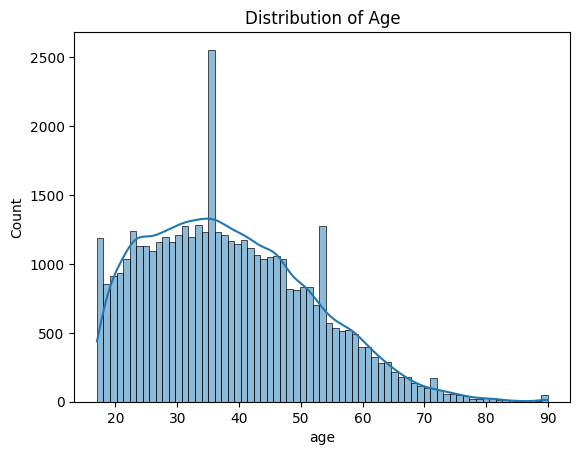

In [33]:
sns.histplot(df.age, kde=True)
plt.title("Distribution of Age")

In [34]:
df[(df.age >= 17) & (df.age <= 55)]

,age,workclass,education,marital-status,occupation,relationship,race,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,40,United-States,<=50K
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,40,United-States,>50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,20,United-States,<=50K


In [35]:
sum(df['age'].between(17,55))

39877

In [36]:
#df.groupby('gender')['income'].mean().sort_values(ascending=False)

In [37]:
#Encoder categorical columns
lb = LabelEncoder()
df.workclass=lb.fit_transform(df.workclass)
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.occupation=lb.fit_transform(df.occupation)
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
#df.gender=lb.fit_transform(df.gender)
df['native-country']=lb.fit_transform(df['native-country'])
df.income=lb.fit_transform(df.income)

In [38]:
X = df.drop('income', axis=1)
y = df['income']

In [39]:
st = StandardScaler()
X_scaled = st.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.1)

In [41]:
print(X_train.shape, X_test.shape)

(40657, 9) (4518, 9)


In [42]:
# find best k
k_range = range(1, 11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.7605314897642598, 0.7828445889773745, 0.7835309194922766, 0.7913228496978068, 0.7903930878213955, 0.7955509573150588, 0.7921861664110292, 0.7958829430268006, 0.7950196165134067, 0.7977423834781652]


In [43]:
# k == 10 has the best accuracy
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
# pred
y_pred=knn.predict(X_test)

In [45]:
# Acuracy
print("Training set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Testing set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Training set Accuracy:  0.8438153331529626
Testing set Accuracy:  0.814962372731297


In [46]:
# mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.18503762726870296

In [47]:
df.income.unique()

array([0, 1])

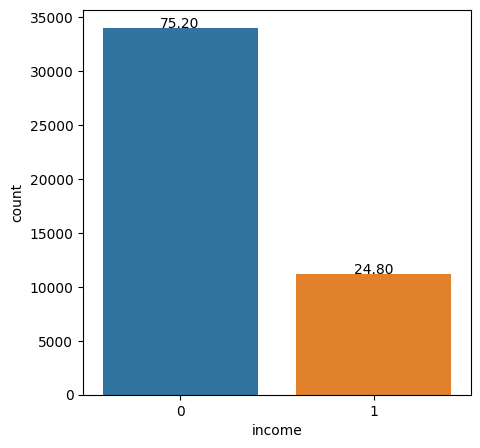

In [48]:
import seaborn as sns

plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x = "income", data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()